In [85]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1> FUNCIONES </h1>

<h5> <i> Funciones de scoring </i> </h5>

In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [87]:
def score(y_true,y_pred):
    '''
    Devuelve una breve descripción de la precisión del Modelo.
    Accuracy Score: Este indicador muestra que tan buena fue la predicción. 
                    Esta medida se ve influenciada por que tan balanceada  
                    está la muestra.                                       
                    Por regla general para ser bueno este score tiene que  
                    ser mayor que el porcentaje de la etiqueta más común.  
    Recall Score: Este indicador penaliza los falsos positivos.            
    Precision Score: Este indicador penaliza los falsos negativos.         
    Confusion Matrix: Nos muestra en forma matricial los resultados.       
                      En la diagonal principal están las etiquetas que    
                      acertó.
                      En las dos celdas restantes muestra los que erró.     
    
    '''
    accur = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred)
    conf_mat =confusion_matrix(y_true, y_pred_test)
    print('Accuracy Score:',accur)
    print('------------------')
    print('Precision Score:',prec)
    print('------------------')
    print('Recall Score:',rec)
    print('------------------')
    sns.heatmap(conf_mat, annot=True,);
    plt.ylabel('y_test')
    plt.xlabel('y_pred_test');

# DISCRETIZACION 

In [88]:
criterio=pd.read_csv('Discretization-Criteria.csv')
criterio

,Feature Names,Feature Values,Discretization (Items)
0,Age,32:61,"[0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52]..."
1,Gender,"Male,Female","[Male], [Female]"
2,BMI(Body Mass Index),22:35,"[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35;..."
3,Fever,"Absent, Present","[Absent], [Present] -"
4,Nausea/Vomiting,"Absent, Present","[Absent], [Present] -"
5,Headache,"Absent, Present","[Absent], [Present] -"
6,Diarrhea,"Absent, Present","[Absent], [Present] -"
7,Fatigue,"Absent, Present","[Absent], [Present] -"
8,Bone ache,"Absent, Present","[Absent], [Present] -"
9,Jaundice,"Absent, Present","[Absent], [Present] -"


In [89]:
criterio.loc[28,['Discretization (Items)']]


Discretization (Items)    [No Fibrosis], [Portal Fibrosis],Staging (Clas...
Name: 28, dtype: object

# DATASET

In [90]:
df=pd.read_csv('HCV-Egy-Data.csv')
df.sample(5)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
1250,43,1,31,2,2,2,2,1,1,2,...,73,117,25,295779,125734,49697,251669,512412,6,3
408,49,1,33,2,1,1,2,1,1,1,...,83,128,31,758053,142633,50252,491045,809017,12,3
1057,59,1,35,1,1,1,2,2,1,2,...,96,58,24,352904,1066128,5,5,5,12,1
921,32,1,31,1,1,1,1,2,2,2,...,128,76,34,364186,888527,492947,352946,578238,12,3
769,59,2,33,1,1,1,1,2,1,2,...,84,79,45,510899,85267,5,5,5,3,3


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null int64
BMI                                 1385 non-null int64
Fever                               1385 non-null int64
Nausea/Vomting                      1385 non-null int64
Headache                            1385 non-null int64
Diarrhea                            1385 non-null int64
Fatigue & generalized bone ache     1385 non-null int64
Jaundice                            1385 non-null int64
Epigastric pain                     1385 non-null int64
WBC                                 1385 non-null int64
RBC                                 1385 non-null float64
HGB                                 1385 non-null int64
Plat                                1385 non-null float64
AST 1                               1385 non-null int64
ALT 1                               1385 non-null

In [92]:
for column in df.columns:
    if np.array_equal(pd.unique(df[column]), np.array([2,1])) or np.array_equal(pd.unique(df[column]), np.array([1,2])): 
        df.loc[:,column] = df.loc[:,column] -1

In [94]:
df.rename(mapper={'Gender':'Female'},axis=1,inplace = True)
df

,Age,Female,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,0,35,1,0,0,0,1,1,1,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,0,29,0,1,1,0,1,1,0,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,0,33,1,1,1,1,0,0,0,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,1,33,0,1,0,1,0,1,0,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,0,32,0,0,1,0,1,1,1,...,94,90,30,660410,738756,3731527,338946,242861,11,1
5,58,1,22,1,1,1,0,1,1,0,...,73,114,29,1157452,1086852,5,5,5,4,4
6,42,1,26,0,0,1,1,1,1,1,...,84,80,28,325694,1034008,275095,214566,635157,12,4
7,48,1,30,0,0,1,1,0,0,1,...,96,53,39,641129,72050,787295,370605,506296,12,3
8,44,0,23,0,0,1,1,1,0,1,...,122,39,45,591441,757361,5,371090,203042,5,2
9,45,0,30,1,0,1,1,0,0,1,...,125,43,30,1151206,230488,267320,275295,555516,4,2


In [24]:
np.array([2,1])

array([2, 1])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                 1385 non-null int64
Gender                              1385 non-null int64
BMI                                 1385 non-null int64
Fever                               1385 non-null int64
Nausea/Vomting                      1385 non-null int64
Headache                            1385 non-null int64
Diarrhea                            1385 non-null int64
Fatigue & generalized bone ache     1385 non-null int64
Jaundice                            1385 non-null int64
Epigastric pain                     1385 non-null int64
WBC                                 1385 non-null int64
RBC                                 1385 non-null float64
HGB                                 1385 non-null int64
Plat                                1385 non-null float64
AST 1                               1385 non-null int64
ALT 1                               1385 non-null

In [128]:
df.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [129]:
data=df.loc[:,['Age ','Gender', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat','Baseline histological Grading', 'Baselinehistological staging']]

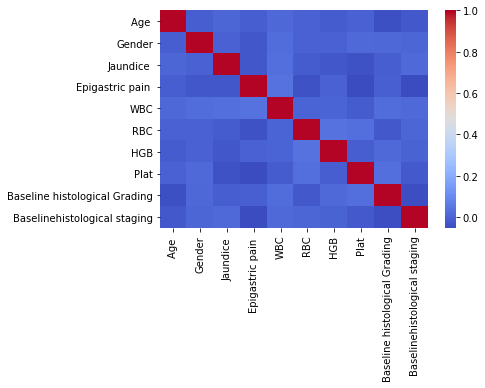

In [130]:
sns.heatmap(data.corr(),cmap="coolwarm");

In [131]:
df['Baselinehistological staging'].unique()

array([2, 4, 3, 1], dtype=int64)

In [132]:
df['Baseline histological Grading'].unique()

array([13,  4, 10, 11, 12,  5, 15, 16,  8,  9,  3,  6,  7, 14],
      dtype=int64)

# MODELO

In [133]:
from sklearn.model_selection import train_test_split

from sklearn import linear_model

In [134]:
X = df.loc[:,['Age ', 'Gender','WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading']]
y = df['Baselinehistological staging']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)

# Estandarizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
lg = linear_model.LogisticRegression(C=0.5)

lg.fit(X_train, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_train = lg.predict(X_train)

y_pred_test = lg.predict(X_test)

C:\Users\VE465PV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\VE465PV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [137]:
y_test.shape

(458,)

In [138]:
y_pred_test.shape

(458,)

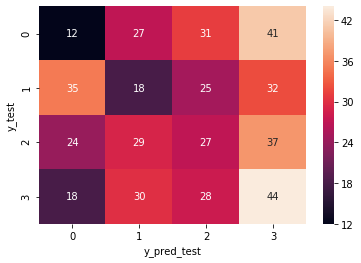

In [139]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True);
plt.ylabel('y_test')
plt.xlabel('y_pred_test');

In [140]:
accuracy_score(y_test, y_pred_test)

0.2205240174672489

# PREPROCESAMIENTO

In [141]:
stage= df['Baselinehistological staging'].apply(lambda x: 0 if x <3 else 1)

stage.head(5)

0    0
1    0
2    1
3    1
4    0
Name: Baselinehistological staging, dtype: int64

In [142]:
stage.shape

(1385,)

In [143]:
stage.value_counts(normalize=True)

1    0.51769
0    0.48231
Name: Baselinehistological staging, dtype: float64

In [144]:
df.shape

(1385, 29)

In [145]:
new_df= df.copy()
new_df.loc[:,'Baselinehistological staging']= stage
new_df.loc[:,'Baselinehistological staging'].head()

0    0
1    0
2    1
3    1
4    0
Name: Baselinehistological staging, dtype: int64

In [146]:
new_df.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,0
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,0
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,1
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,1
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,0


In [147]:
# Para new_df
# X= 'Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
#    'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
#    'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
#    'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
#    'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
#   'Baseline histological Grading'

# y= Baselinehistological_staging

In [148]:
#X = new_df.loc[:,['Age ','BMI', 'Jaundice ',/
#  'Epigastric pain ','Gender','WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
#       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
#       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
#       'Baseline histological Grading']]
X = new_df.drop(columns=['Baselinehistological staging'])
y = new_df['Baselinehistological staging']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)

# Estandarizar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [149]:
lg = linear_model.LogisticRegression(C=1e10)

lg.fit(X_train, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_train = lg.predict(X_train)

y_pred_test = lg.predict(X_test)

C:\Users\VE465PV\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score: 0.537117903930131
------------------
Precision Score: 0.5471698113207547
------------------
Recall Score: 0.6118143459915611
------------------


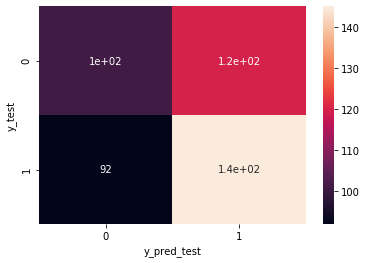

In [150]:
score(y_test, y_pred_test)

########

# FORWARD

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


In [ ]:
X = new_df.loc[:,['Age ', 'Fatigue & generalized bone ache ', 'Jaundice ',
  'Epigastric pain ','Gender','WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading']]
y = new_df['Baselinehistological_staging']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 20),
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 5,
          n_jobs= -1
         ).fit(X_train, y_train)


In [ ]:
sfs.k_feature_names_

In [ ]:
sfs.k_feature_idx_


In [ ]:
sfs.k_score_


In [48]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.553763440860215, 0.5806451612903226, 0.5513...",0.537152,"(12,)",0.0426089,0.0331511,0.0165756
2,"(12, 16)","[0.5591397849462365, 0.5645161290322581, 0.545...",0.550137,"(12, 16)",0.0154589,0.0120275,0.00601376
3,"(12, 15, 16)","[0.543010752688172, 0.5860215053763441, 0.5459...",0.544725,"(12, 15, 16)",0.0338946,0.0263712,0.0131856
4,"(12, 15, 16, 19)","[0.532258064516129, 0.5752688172043011, 0.5837...",0.556641,"(12, 15, 16, 19)",0.0251012,0.0195296,0.00976479
5,"(2, 12, 15, 16, 19)","[0.543010752688172, 0.5752688172043011, 0.5783...",0.564196,"(2, 12, 15, 16, 19)",0.0160619,0.0124967,0.00624834
6,"(2, 12, 15, 16, 19, 22)","[0.5645161290322581, 0.553763440860215, 0.6162...",0.566359,"(2, 12, 15, 16, 19, 22)",0.0346806,0.0269827,0.0134913
7,"(2, 12, 15, 16, 19, 21, 22)","[0.5483870967741935, 0.510752688172043, 0.5783...",0.563179,"(2, 12, 15, 16, 19, 21, 22)",0.0409576,0.0318664,0.0159332
8,"(2, 7, 12, 15, 16, 19, 21, 22)","[0.5483870967741935, 0.5268817204301075, 0.535...",0.563162,"(2, 7, 12, 15, 16, 19, 21, 22)",0.0424792,0.0330503,0.0165251
9,"(2, 7, 8, 12, 15, 16, 19, 21, 22)","[0.5860215053763441, 0.510752688172043, 0.5405...",0.563139,"(2, 7, 8, 12, 15, 16, 19, 21, 22)",0.0447858,0.0348449,0.0174225
10,"(2, 4, 7, 8, 12, 15, 16, 19, 21, 22)","[0.553763440860215, 0.510752688172043, 0.55675...",0.550201,"(2, 4, 7, 8, 12, 15, 16, 19, 21, 22)",0.0491641,0.0382513,0.0191257


# Backward 

In [55]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = (1, 20),
          forward= False,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 5,
          n_jobs= -1
         ).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  23 | elapsed:    5.5s remaining:   26.0s
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    6.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    7.7s finished

[2019-10-27 22:56:46] Features: 22/1 -- score: 0.5048648648648648[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    5.1s remaining:   32.3s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    5.6s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    7.4s finished

[2019-10-27 22:56:54] Features: 21/1 -- score: 0.5081604184829992[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    5.3s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    7.2s finished

[2019-10-27 22:57:

In [56]:
sfs.k_feature_names_

('3', '7', '15')

In [57]:
sfs.k_feature_idx_

(3, 7, 15)

In [58]:
sfs.k_score_

0.5480441732054635

In [59]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
23,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.46774193548387094, 0.44623655913978494, 0.5...",0.481174,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0355129,0.0276303,0.0138151
22,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.532258064516129, 0.46774193548387094, 0.535...",0.504865,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0382969,0.0297963,0.0148981
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.510752688172043, 0.44086021505376344, 0.540...",0.50816,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0482354,0.0375288,0.0187644
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.4946236559139785, 0.4946236559139785, 0.572...",0.501633,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0499325,0.0388492,0.0194246
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.553763440860215, 0.44086021505376344, 0.524...",0.509195,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0546087,0.0424874,0.0212437
18,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.521505376344086, 0.44623655913978494, 0.556...",0.520035,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0772905,0.0601346,0.0300673
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5, 0.4731182795698925, 0.5567567567567567, ...",0.51138,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0347819,0.0270615,0.0135307
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.5161290322580645, 0.46236559139784944, 0.54...",0.50705,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0377503,0.029371,0.0146855
15,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...","[0.5483870967741935, 0.4838709677419355, 0.540...",0.518884,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15...",0.0305628,0.0237789,0.0118895
14,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 21)","[0.5053763440860215, 0.45698924731182794, 0.58...",0.512473,"(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 21)",0.0599607,0.0466515,0.0233257


# Exhaustive Feature Selection (EFS)

In [76]:
new_df.loc[:,['Baseline histological Grading', 'Baselinehistological_staging']].sample(20)

,Baseline histological Grading,Baselinehistological_staging
1343,11,0
440,10,1
774,7,0
996,3,1
516,15,1
1373,3,1
385,6,1
481,13,0
1133,3,1
25,9,1


In [109]:
new_df.iloc[774] ,new_df.iloc[996]

(Age                                      42.0
 Gender                                    2.0
 BMI                                      34.0
 Fever                                     2.0
 Nausea/Vomting                            1.0
 Headache                                  1.0
 Diarrhea                                  1.0
 Fatigue & generalized bone ache           1.0
 Jaundice                                  1.0
 Epigastric pain                           1.0
 WBC                                   11164.0
 RBC                                 4418987.0
 HGB                                      12.0
 Plat                                 207239.0
 AST 1                                    89.0
 ALT 1                                    65.0
 ALT4                                    107.0
 ALT 12                                  105.0
 ALT 24                                   74.0
 ALT 36                                   41.0
 ALT 48                                   61.0
 ALT after 24

In [84]:
new_df['Baseline histological Grading'].unique()

array([13,  4, 10, 11, 12,  5, 15, 16,  8,  9,  3,  6,  7, 14])

In [88]:
df.loc[:,['Baseline histological Grading', 'Baselinehistological staging']].sample(20)

,Baseline histological Grading,Baselinehistological staging
674,11,3
481,13,2
836,15,4
1372,15,3
429,15,2
250,13,1
1288,13,4
963,15,4
814,3,3
148,12,4


In [207]:
X = new_df.loc[:,['Jaundice ','ALT 12', 'ALT 48', 'ALT after 24 w','RNA 12', 
       'Baseline histological Grading']]
y = new_df['Baselinehistological_staging']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
lg = linear_model.LogisticRegression(C=10000,penalty= 'l2')

lg.fit(X_train, y_train)

X_test_scaled = scaler.transform(X_test)

y_pred_train = lg.predict(X_train)

y_pred_test = lg.predict(X_test)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


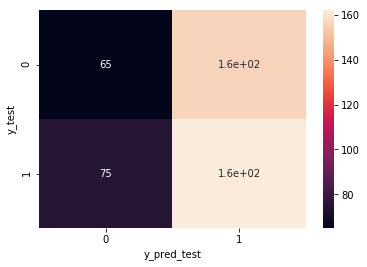

In [209]:
score(y_test, y_pred_test)

In [211]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.47      0.42      0.44       221
           1       0.51      0.55      0.53       237

    accuracy                           0.49       458
   macro avg       0.49      0.49      0.49       458
weighted avg       0.49      0.49      0.49       458



# K-NN

In [203]:
X = new_df.loc[:,['Jaundice ','ALT 12', 'ALT 48', 'ALT after 24 w','RNA 12', 
       'Baseline histological Grading']]
y = new_df['Baselinehistological_staging']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

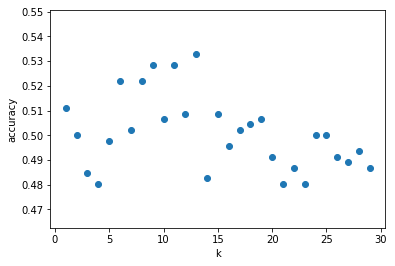

In [204]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30]);

In [205]:
n_neighbors = 5
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.68
Accuracy of K-NN classifier on test set: 0.50


In [206]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 95 126]
 [104 133]]
              precision    recall  f1-score   support

           0       0.48      0.43      0.45       221
           1       0.51      0.56      0.54       237

    accuracy                           0.50       458
   macro avg       0.50      0.50      0.49       458
weighted avg       0.50      0.50      0.50       458



In [ ]:
score(y_test, pred)

# NAIVE BAYES 

In [218]:
X = new_df.loc[:,['Jaundice ','ALT 12', 'ALT 48', 'ALT after 24 w','RNA 12', 
       'Baseline histological Grading']]
y = new_df['Baselinehistological_staging']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, stratify=y)

In [219]:
from sklearn.naive_bayes import GaussianNB

modelo_NB = GaussianNB()
modelo_NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [220]:
labels_predichas = modelo_NB.predict(X_test)
labels_predichas

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [221]:
score(y_test, labels_predichas)

0.5305676855895196

In [223]:
print(classification_report(y_test, labels_predichas))

              precision    recall  f1-score   support

           0       0.52      0.42      0.46       221
           1       0.54      0.64      0.58       237

    accuracy                           0.53       458
   macro avg       0.53      0.53      0.52       458
weighted avg       0.53      0.53      0.52       458

